# 这两块的代码不要动，顺序运行即可

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rank_matrix(matrix):
    cnum = matrix.shape[1]
    rnum = matrix.shape[0]
    ## 升序排序索引
    sorts = np.argsort(matrix)
    for i in range(rnum):
        k = 1
        n = 0
        flag = False
        nsum = 0
        for j in range(cnum):
            n = n+1
            ## 相同排名评分序值
            if j < 3 and matrix[i, sorts[i,j]] == matrix[i, sorts[i,j + 1]]:
                flag = True;
                k = k + 1;
                nsum += j + 1;
            elif (j == 3 or (j < 3 and matrix[i, sorts[i,j]] != matrix[i, sorts[i,j + 1]])) and flag:
                nsum += j + 1
                flag = False;
                for q in range(k):
                    matrix[i,sorts[i,j - k + q + 1]] = nsum / k
                k = 1
                flag = False
                nsum = 0
            else:
                matrix[i, sorts[i,j]] = j + 1
                continue
    return matrix

"""
    Friedman检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回检验结果（对应于排序矩阵列顺序的一维数组）
"""
def friedman(n, k, rank_matrix):
    # 计算每一列的排序和
    sumr = sum(list(map(lambda x: np.mean(x) ** 2, rank_matrix)))
    result = 12 * n / (k * ( k + 1)) * (sumr - k * (k + 1) ** 2 / 4)
    result = (n - 1) * result /(n * (k - 1) - result)
    return result

"""
    Nemenyi检验
    参数：数据集个数n, 算法种数k, 排序矩阵rank_matrix(k x n)
    函数返回CD值
"""

def nemenyi(n, k, q):
    return q * (np.sqrt(k * (k + 1) / (6 * n)))

## 修改matrix_rank来调整输入矩阵，思考一下应该是几行几列

## 修改Friedman和Nemenyi的参数

rank: [[4 4 2 4]
 [3 3 4 3]
 [2 1 1 1]
 [5 5 5 5]
 [1 2 3 2]]
Friedman: 15.461538461538465
CD: 3.0499967213097134
Email: 1493347833@qq.com


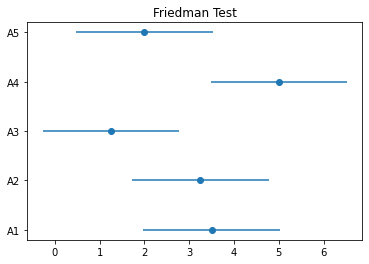

In [12]:
    
matrix_rank = np.array([[4, 4, 2, 4], [3, 3, 4, 3], [2, 1, 1, 1],
                        [5, 5, 5, 5], [1, 2, 3, 2]])    #每行代表1个分类器在4个性能指标/数据集上的表现

Friedman = friedman(4, 5, matrix_rank)    #修改参数

CD = nemenyi(4, 5, 2.728)    #参数

## 画CD图
rank_x = list(map(lambda x: np.mean(x), matrix_rank))
name_y = ["A1", "A2", "A3", "A4", "A5"]
min_ = [x for x in rank_x - CD/2]
max_ = [x for x in rank_x + CD/2]

plt.title("Friedman Test")
plt.scatter(rank_x, name_y)
plt.hlines(name_y, min_,max_)

print("rank:", matrix_rank)
print("Friedman:", Friedman)
print("CD:", CD)
print("Email: 1493347833@qq.com")    #截图显示Canvasqq号
    



